# Question 1

In [5]:
# Import necessary libraries
import pandas as pd

# Import the dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

# Calculate mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean().round(1).reset_index()
mean_age_per_occupation.columns = ['Occupation', 'Mean Age']
print('MEAN AGE PER OCCUPATION')
print(mean_age_per_occupation.to_string(index=False))  # Avoid showing the index

# Calculate male ratio per occupation
users['gender_num'] = users['gender'].map({'M': 1, 'F': 0})
male_ratio = users.groupby('occupation')['gender_num'].mean().sort_values(ascending=False).round(1).reset_index()
male_ratio.columns = ['Occupation', 'Male Ratio']
print('MALE RATIO PER OCCUPATION')
print(male_ratio.to_string(index=False))  # Avoid showing the index

# Calculate min and max age per occupation
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max']).reset_index()
min_max_age_per_occupation.columns = ['Occupation', 'Min Age', 'Max Age']
print('MIN AND MAX AGE PER OCCUPATION')
print(min_max_age_per_occupation.to_string(index=False))  # Avoid showing the index

# Calculate mean age per occupation and gender
mean_age_per_occ_gender = users.groupby(['occupation', 'gender'])['age'].mean().round(1).reset_index()
mean_age_per_occ_gender.columns = ['Occupation', 'Gender', 'Mean Age']
print('MEAN AGE PER OCCUPATION AND GENDER')
print(mean_age_per_occ_gender.to_string(index=False))  # Avoid showing the index

# Calculate percentage of women and men per occupation
occupation_counts = users['occupation'].value_counts()
women_counts = users[users['gender'] == 'F']['occupation'].value_counts()
women_percentage = ((women_counts / occupation_counts) * 100).fillna(0).round(1)
men_percentage = 100 - women_percentage.round(1)
gender_percentage = pd.DataFrame({
    'Occupation': women_percentage.index,
    'Women': women_percentage.values,
    'Men': men_percentage.values
})
print('PERCENTAGE OF WOMEN AND MEN PER OCCUPATION')
print(gender_percentage.to_string(index=False))  # Avoid showing the index


MEAN AGE PER OCCUPATION
   Occupation  Mean Age
administrator      38.7
       artist      31.4
       doctor      43.6
     educator      42.0
     engineer      36.4
entertainment      29.2
    executive      38.7
   healthcare      41.6
    homemaker      32.6
       lawyer      36.8
    librarian      40.0
    marketing      37.6
         none      26.6
        other      34.5
   programmer      33.1
      retired      63.1
     salesman      35.7
    scientist      35.5
      student      22.1
   technician      33.1
       writer      36.3
MALE RATIO PER OCCUPATION
   Occupation  Male Ratio
       doctor         1.0
     engineer         1.0
   technician         1.0
      retired         0.9
   programmer         0.9
    executive         0.9
    scientist         0.9
entertainment         0.9
       lawyer         0.8
     salesman         0.8
     educator         0.7
      student         0.7
        other         0.7
    marketing         0.6
       writer         0.6
      

# Question 2

In [9]:
# Import the necessary libraries
import pandas as pd

# Import the dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

# Select only the Goal column
goals = euro12[['Team', 'Goals']]  # Include Team for context
print('\nGOALS COLUMN:')
print(goals.to_string(index=False))

# How many teams participated in Euro2012?
num_teams = euro12['Team'].nunique()
print(f'\nNUMBER OF TEAMS THAT PARTICIPATED IN EURO 2012: {num_teams}')

# What is the number of columns in the dataset?
num_columns = euro12.shape[1]
print(f'\nNUMBER OF COLUMNS IN THE DATASET: {num_columns}')

# View only the columns Team, Yellow Cards, and Red Cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print('\nDISCIPLINE DATAFRAME (Team, Yellow Cards, Red Cards):')
print(discipline.to_string(index=False, justify='center'))

# Sort the teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[True, True])
print('\nTEAMS SORTED BY RED CARDS, THEN BY YELLOW CARDS:')
print(discipline_sorted.to_string(index=False, justify='center'))

# Calculate the mean Yellow Cards given per team
mean_yellow_cards = discipline['Yellow Cards'].mean().round(1)
print(f'\nMEAN YELLOW CARDS GIVEN PER TEAM: {mean_yellow_cards}')

# Filter teams that scored more than 6 goals
teams_with_more_than_6_goals = euro12[euro12['Goals'] > 6][['Team', 'Goals']]
print('\nTEAMS THAT SCORED MORE THAN 6 GOALS:')
print(teams_with_more_than_6_goals.to_string(index=False, justify='center'))

# Select the teams that start with 'G'
teams_starting_with_g = euro12[euro12['Team'].str.startswith('G')][['Team']]
print('\nTEAMS THAT START WITH "G":')
print(teams_starting_with_g.to_string(index=False, justify='center'))

# Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print('\nFIRST 7 COLUMNS:')
print(first_7_columns.to_string(index=False, justify='center'))

# Select all columns except the last 3
all_but_last_3_columns = euro12.iloc[:, :-3]
print('\nALL COLUMNS EXCEPT THE LAST 3:')
print(all_but_last_3_columns.to_string(index=False, justify='center'))

# Present only the Shooting Accuracy from England, Italy, and Russia
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print('\nSHOOTING ACCURACY FROM ENGLAND, ITALY, AND RUSSIA:')
print(shooting_accuracy.to_string(index=False, justify='center'))



GOALS COLUMN:
               Team  Goals
            Croatia      4
     Czech Republic      4
            Denmark      4
            England      5
             France      3
            Germany     10
             Greece      5
              Italy      6
        Netherlands      2
             Poland      2
           Portugal      6
Republic of Ireland      1
             Russia      5
              Spain     12
             Sweden      5
            Ukraine      2

NUMBER OF TEAMS THAT PARTICIPATED IN EURO 2012: 16

NUMBER OF COLUMNS IN THE DATASET: 35

DISCIPLINE DATAFRAME (Team, Yellow Cards, Red Cards):
        Team         Yellow Cards  Red Cards
            Croatia        9          0     
     Czech Republic        7          0     
            Denmark        4          0     
            England        5          0     
             France        6          0     
            Germany        4          0     
             Greece        9          1     
              Italy  

# Question 3

In [10]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# Create 3 different Series
series1 = pd.Series(np.random.randint(1, 5, 100))
series2 = pd.Series(np.random.randint(1, 4, 100))
series3 = pd.Series(np.random.randint(10000, 30001, 100))

# Create a DataFrame by joining the Series by column
df = pd.concat([series1, series2, series3], axis=1)

# Change the name of the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print('\nDataFrame with renamed columns:')
print(df.head())

# Create a one-column DataFrame from the values of the 3 Series
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True)
bigcolumn_df = pd.DataFrame(bigcolumn, columns=['bigcolumn'])
print('\nOne-column DataFrame:')
print(bigcolumn_df.head(105))  # Display more rows to check indexing

# Check if it stops at index 99
print(f'\nDoes the one-column DataFrame stop at index 99? {"Yes" if bigcolumn_df.index.max() == 99 else "No"}')

# Reindex the DataFrame to go from 0 to 299
bigcolumn_df_reindexed = bigcolumn_df.reindex



DataFrame with renamed columns:
   bedrs  bathrs  price_sqr_meter
0      1       1            27947
1      4       1            18820
2      2       1            17218
3      2       3            11114
4      1       2            25814

One-column DataFrame:
     bigcolumn
0            1
1            4
2            2
3            2
4            1
..         ...
100          1
101          1
102          1
103          3
104          2

[105 rows x 1 columns]

Does the one-column DataFrame stop at index 99? No


# Question 4

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Import the dataset
# Assuming the file "wind.txt" is in the same directory or provide the correct path
file_path = "wind.txt"
data = pd.read_csv(file_path, delim_whitespace=True, parse_dates=[[0, 1, 2]], na_values='NaN')

# Rename the combined datetime column and replace the first 3 columns with a proper datetime index
data.rename(columns={'Yr_Mo_Dy': 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%y %m %d')
data.set_index('Date', inplace=True)

# Fix the year 2061 issue
def fix_year(date):
    if date.year > 2000:
        return date.replace(year=date.year - 100)
    return date

data.index = data.index.map(fix_year)

# Ensure the index is of type datetime64[ns]
print(f'Data index type: {data.index.dtype}')

# Compute missing values for each location
missing_values = data.isna().sum()
print('\nMissing values for each location:')
print(missing_values)

# Compute total non-missing values
non_missing_values = data.notna().sum().sum()
print(f'\nTotal non-missing values: {non_missing_values}')

# Calculate mean windspeeds over all locations and all times
overall_mean = data.mean().mean()
print(f'\nOverall mean windspeeds: {overall_mean:.2f}')

# Calculate statistics for each location
loc_stats = data.describe().T[['min', 'max', 'mean', 'std']]
print('\nLocation statistics:')
print(loc_stats)

# Calculate statistics for each day
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})
print('\nDaily statistics:')
print(day_stats.head())

# Average windspeed in January for each location
january_data = data[data.index.month == 1]
january_means = january_data.mean()
print('\nAverage windspeed in January for each location:')
print(january_means)

# Downsample to yearly frequency
yearly_data = data.resample('Y').mean()
print('\nYearly frequency downsampled data:')
print(yearly_data.head())

# Downsample to monthly frequency
monthly_data = data.resample('M').mean()
print('\nMonthly frequency downsampled data:')
print(monthly_data.head())

# Downsample to weekly frequency
weekly_data = data.resample('W').mean()
print('\nWeekly frequency downsampled data:')
print(weekly_data.head())

# Weekly statistics for the first 52 weeks
weekly_stats = weekly_data.iloc[:52].agg(['min', 'max', 'mean', 'std'])
print('\nWeekly statistics for the first 52 weeks:')
print(weekly_stats)


Data index type: datetime64[ns]

Missing values for each location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total non-missing values: 78857

Overall mean windspeeds: 10.23

Location statistics:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Daily statistics:
             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.6418

# Question 5

In [15]:
# Import necessary libraries
import pandas as pd

# Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# See the first 10 entries
print('\nFirst 10 entries:')
print(chipo.head(10))

# What is the number of observations in the dataset?
num_observations = chipo.shape[0]
print(f'\nNumber of observations in the dataset: {num_observations}')

# What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print(f'\nNumber of columns in the dataset: {num_columns}')

# Print the name of all the columns
print('\nNames of all columns:')
print(chipo.columns.tolist())

# How is the dataset indexed?
print('\nIndex of the dataset:')
print(chipo.index)

# Which was the most-ordered item?
most_ordered_item = (
    chipo.groupby('item_name', as_index=False)['quantity'].sum()
    .sort_values('quantity', ascending=False)
    .iloc[0]
)
print(f'\nMost ordered item: {most_ordered_item["item_name"]}')

# For the most-ordered item, how many items were ordered?
most_ordered_quantity = most_ordered_item['quantity']
print(f'\nNumber of items ordered for the most-ordered item: {most_ordered_quantity}')

# What was the most ordered item in the choice_description column?
most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()
print(f'\nMost ordered item in choice_description: {most_ordered_choice_description}')

# How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print(f'\nTotal items ordered: {total_items_ordered}')

# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].str.replace('$', '', regex=False).astype(float)

# Check the item price type
print(f'\nItem price data type: {chipo["item_price"].dtype}')

# How much was the revenue for the period in the dataset?
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()
print(f'\nTotal revenue: ${total_revenue:.2f}')

# How many orders were made in the period?
total_orders = chipo['order_id'].nunique()
print(f'\nTotal orders made: {total_orders}')

# What is the average revenue amount per order?
average_revenue_per_order = total_revenue / total_orders
print(f'\nAverage revenue per order: ${average_revenue_per_order:.2f}')

# How many different items are sold?
num_unique_items = chipo['item_name'].nunique()
print(f'\nNumber of different items sold: {num_unique_items}')



First 10 entries:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3           

# Question 6

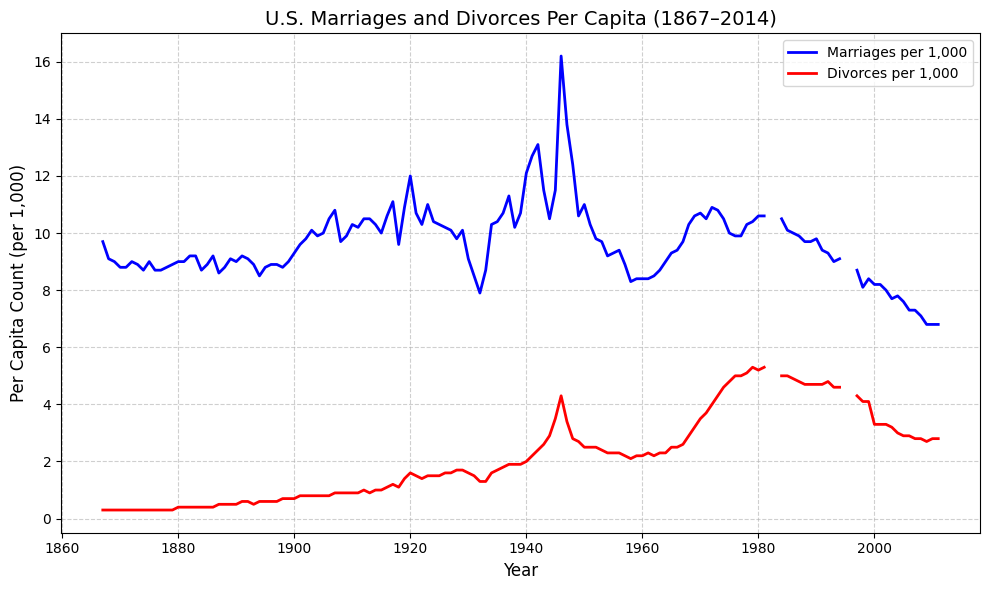

In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

# Create a line plot
plt.figure(figsize=(10, 6))

# Plot the number of marriages and divorces per capita
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1,000', color='blue', linewidth=2)
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1,000', color='red', linewidth=2)

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Per Capita Count (per 1,000)', fontsize=12)
plt.title('U.S. Marriages and Divorces Per Capita (1867–2014)', fontsize=14)

# Add legend
plt.legend(loc='upper right', fontsize=10)

# Customize grid and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()


# Question 7

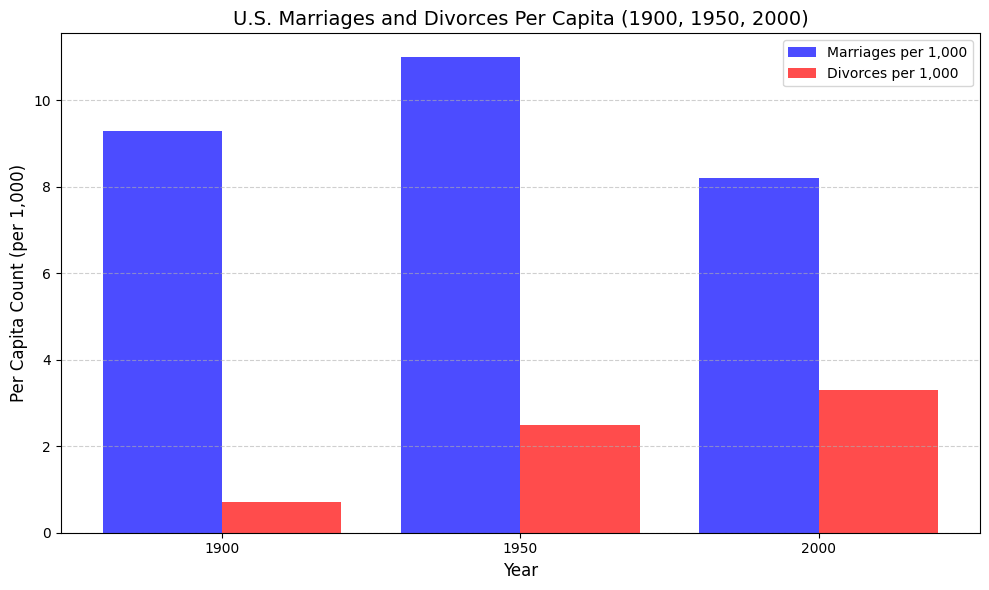

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

# Filter data for the years 1900, 1950, and 2000
filtered_data = data[data['Year'].isin([1900, 1950, 2000])]

# Create a bar chart
plt.figure(figsize=(10, 6))
width = 0.4  # Width of the bars

# Positions for the bars
x = range(len(filtered_data['Year']))

# Plot the bars for marriages and divorces
plt.bar(x, filtered_data['Marriages_per_1000'], width=width, label='Marriages per 1,000', color='blue', alpha=0.7)
plt.bar([i + width for i in x], filtered_data['Divorces_per_1000'], width=width, label='Divorces per 1,000', color='red', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Per Capita Count (per 1,000)', fontsize=12)
plt.title('U.S. Marriages and Divorces Per Capita (1900, 1950, 2000)', fontsize=14)
plt.xticks([i + width / 2 for i in x], filtered_data['Year'], fontsize=10)  # Center the ticks between bars
plt.legend(fontsize=10)

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Question 8

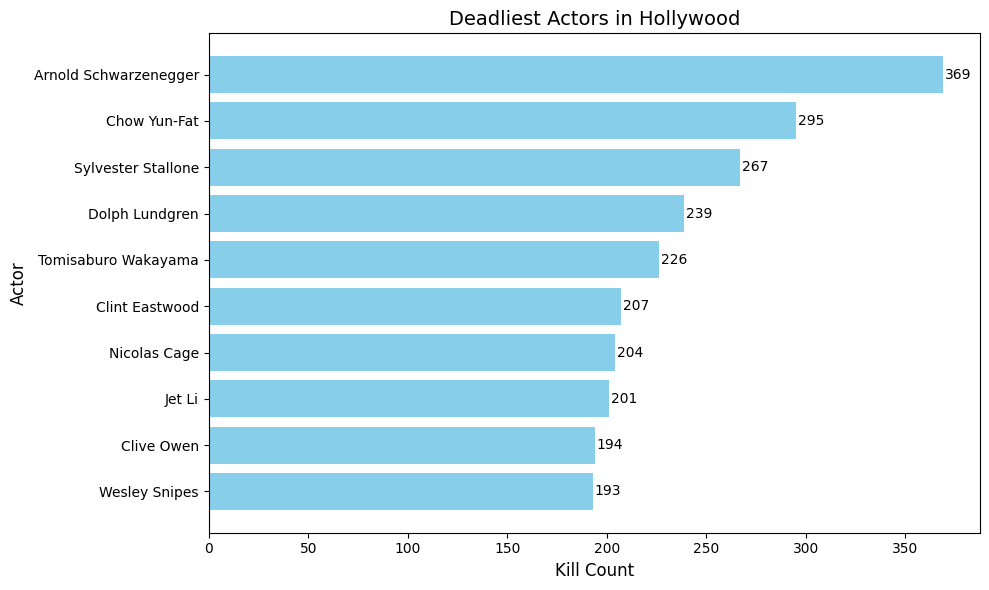

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'actor_kill_counts.csv'  # Replace with the correct file path if needed
df = pd.read_csv(file_path)

# Sort the DataFrame by kill count in ascending order for a better horizontal layout
df = df.sort_values('Count', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['Actor'], df['Count'], color='skyblue')

# Add labels and title
plt.xlabel('Kill Count', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.title('Deadliest Actors in Hollywood', fontsize=14)

# Add kill count labels next to each bar
for index, value in enumerate(df['Count']):
    plt.text(value + 1, index, str(value), va='center', fontsize=10)

# Adjust layout to fit everything
plt.tight_layout()

# Display the plot
plt.show()


# Question 9

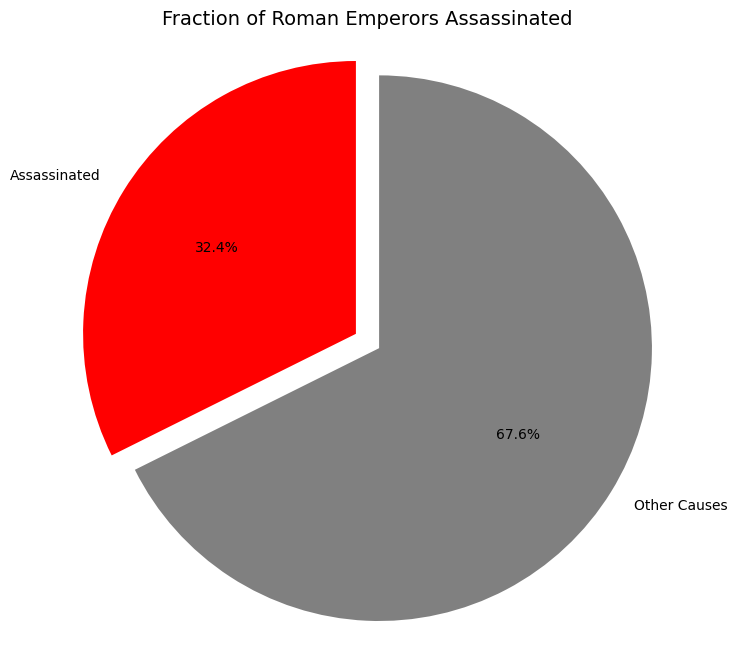

In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'roman-emperor-reigns.csv'  # Replace with the correct path if needed
df = pd.read_csv(file_path)

# Count the occurrences of each death type
death_counts = df['Cause_of_Death'].value_counts()

# Identify the fraction of emperors assassinated
assassinated_count = death_counts.get('Assassinated', 0)
other_count = death_counts.sum() - assassinated_count

# Prepare data for the pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated_count, other_count]
colors = ['red', 'grey']
explode = (0.1, 0)  # Slightly separate the "Assassinated" slice

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    explode=explode
)
plt.title('Fraction of Roman Emperors Assassinated', fontsize=14)
plt.axis('equal')  # Ensure the pie chart is a circle

# Display the plot
plt.show()


# Question 10

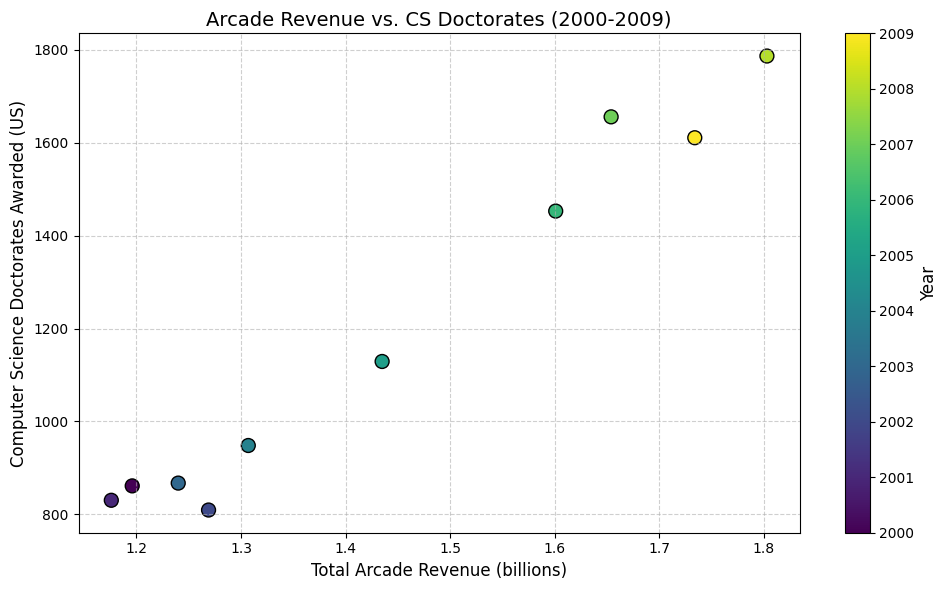

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'arcade-revenue-vs-cs-doctorates.csv'  # Replace with your file path if needed
df = pd.read_csv(file_path)

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['Total Arcade Revenue (billions)'], 
    df['Computer Science Doctorates Awarded (US)'], 
    c=df['Year'], 
    cmap='viridis', 
    edgecolor='k',  # Add a black edge to the dots
    s=100           # Size of the dots
)

# Add a color bar for year representation
colorbar = plt.colorbar(scatter)
colorbar.set_label('Year', fontsize=12)

# Add labels and title
plt.xlabel('Total Arcade Revenue (billions)', fontsize=12)
plt.ylabel('Computer Science Doctorates Awarded (US)', fontsize=12)
plt.title('Arcade Revenue vs. CS Doctorates (2000-2009)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to ensure nothing is cut off
plt.tight_layout()

# Display the plot
plt.show()
